# Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from matplotlib import font_manager, rc
%matplotlib inline

import platform
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)


# 배경색 흰색으로 맞춰줌
import matplotlib as mpl
mpl.rc('figure', facecolor = 'w', edgecolor ='w')

# Preprocessing

### Load Data

In [2]:
# Data Load
demo = pd.read_csv('../data/LPOINT_BIG_COMP_01_DEMO.csv', low_memory=False)
pdde = pd.read_csv('../data/LPOINT_BIG_COMP_02_PDDE.csv', low_memory=False)
cop = pd.read_csv('../data/LPOINT_BIG_COMP_03_COP_U.csv', low_memory=False)
clac = pd.read_csv('../data/LPOINT_BIG_COMP_04_PD_CLAC.csv', low_memory=False)
br = pd.read_csv('../data/LPOINT_BIG_COMP_05_BR.csv', low_memory=False)
lpay = pd.read_csv('../data/LPOINT_BIG_COMP_06_LPAY.csv', low_memory=False)

# Column명 변경
demo.columns = ['고객번호', '성별', '연령대', '거주지대분류코드']
pdde.columns = ['고객번호', '영수증번호', '채널구분', '제휴사', '점포코드', '상품코드', '구매일자', '구매시간', '구매금액', '구매수량']
cop.columns = ['고객번호', '영수증번호', '제휴사', '점포코드', '채널구분', '이용일자', '방문일자', '이용시간', '이용금액']
clac.columns = ['상품코드', '소분류명', '대분류명', '중분류명']
br.columns = ['점포코드', '제휴사', '점포대분류코드', '점포중분류코드']
lpay.columns = ['고객번호', '영수증번호', '제휴사', '채널구분', '이용일자', '이용시간', '이용금액']

### Data Preprocessing

- 가독성을 위하여 불필요한 데이터 확인과정 삭제

####  [2. pdde]: 상품 구매 정보

In [3]:
# 중복되는 행 제거 -> 데이터 추출시 고객, 상품 각각 추출하여 중복이 발생한 것으로 판단함
pdde.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

# 결측치 치환 -> na값을 온라인으로 채워줌
pdde['점포코드'] = pdde['점포코드'].fillna('온라인')

#### [3. cop]: 제휴사 이용 정보

In [4]:
# 결측치 치환
cop['점포코드'] = cop['점포코드'].fillna('온라인')

# Data Merge

In [5]:
# 데이터를 통합하기 위하여 칼럼 통합
pdde['타입'] = 'Product'
cop['타입'] = 'Affiliate'
lpay['타입'] = 'Lpay'
pdde['방문일자'] = 0
lpay['방문일자'] = 0
cop['구매수량'] = 0
cop['상품코드'] = np.nan
lpay['점포코드'] = np.nan
lpay['상품코드'] = np.nan
lpay['구매수량'] = 0

In [6]:
# 칼럼명을 새롭게 동일하게 통일
cop.columns = ['고객번호', '영수증번호', '제휴사', '점포코드', '채널구분', '구매일자', '방문일자', '구매시간', '구매금액', '타입', '구매수량', '상품코드']
lpay.columns = ['고객번호', '영수증번호', '제휴사', '채널구분', '구매일자', '구매시간', '구매금액', '타입', '방문일자', '점포코드', '상품코드', '구매수량']

# 상품구매데이터를 기준으로 하여 열을 통일
cop = cop[['고객번호', '영수증번호', '채널구분', '제휴사', '점포코드', '상품코드', '구매일자', '방문일자', '구매시간', '구매금액', '구매수량', '타입']]
lpay = lpay[['고객번호', '영수증번호', '채널구분', '제휴사', '점포코드', '상품코드', '구매일자', '방문일자', '구매시간', '구매금액', '구매수량', '타입']]

# 데이터 타입 변경
lpay['영수증번호'] = lpay['영수증번호'].astype('object')
lpay['점포코드'] = lpay['점포코드'].astype('object')
cop['상품코드'] = cop['상품코드'].astype('object')
lpay['상품코드'] = lpay['상품코드'].astype('object')
pdde['구매금액'] = pdde['구매금액'].astype('int')
pdde['방문일자'] = pdde['방문일자'].astype('int64')
lpay['방문일자'] = lpay['방문일자'].astype('int64')

In [7]:
# 데이터 concat
df = pd.concat([pdde,cop,lpay])
# 고객 정보 테이븛 통합
df = pd.merge(df, demo, on = ['고객번호'], how = 'left')
# 상품 분류 테이블 통합
df = pd.merge(df, br, on = ['점포코드','제휴사'], how = 'left')
# 점포 정보 테이블 통합
df = pd.merge(df, clac, on = ['상품코드'], how = 'left')

In [8]:
# 결측치 확인 -> 데이터를 합치면서 생기는 결측치만 존재
df.isnull().sum()

고객번호             0
영수증번호            0
채널구분             0
제휴사              0
점포코드        353184
상품코드        601488
구매일자             0
구매시간             0
구매금액             0
구매수량             0
타입               0
방문일자             0
성별               0
연령대              0
거주지대분류코드         0
점포대분류코드     729023
점포중분류코드     729023
소분류명        601488
대분류명        601488
중분류명        601488
dtype: int64

- 고객별 구매일자간의 차이 집계

In [9]:
df['날짜'] = df['구매일자'].astype(str)
df['날짜'] = pd.to_datetime(df['날짜'])
# df['날짜'] = df['날짜'].dt.tz_localize('UTC')

In [10]:
df = df.sort_values(by=['날짜'], ascending=[True])
df['diff'] = df.groupby('고객번호')['날짜'].diff().fillna('0').astype(str)
df['diff'] = df['diff'].apply(lambda x: int(x.split()[0]))

In [11]:
df['diff'].nunique()

321

In [12]:
imp = df.groupby('고객번호')[['영수증번호']].count().reset_index()

# 구매를 가장 많이한 고객의 고객번호
# imp[imp['영수증번호']==13636]

In [13]:
# # 구매횟수별로 정렬
# imp.sort_values(by=['영수증번호'], ascending=[False])

In [14]:
imp['영수증번호'].describe()

count    29874.000000
mean       158.863125
std        226.480154
min          1.000000
25%         20.000000
50%         83.000000
75%        211.000000
max      13120.000000
Name: 영수증번호, dtype: float64

# RFM

In [15]:
customer_id = df.groupby('고객번호')[['구매일자']].max().index.tolist()
recency = df.groupby('고객번호')[['구매일자']].max()['구매일자'].tolist()
frequency = df.groupby('고객번호')[['영수증번호']].count()['영수증번호'].tolist()
monetary = df.groupby('고객번호')[['구매금액']].sum()['구매금액'].tolist()

df_rfm = pd.DataFrame({'Customer_ID': customer_id, 'Recency': recency, 'Frequency': frequency, 'Monetary': monetary})

In [16]:
df_rfm['Recency'] = df_rfm['Recency'].astype(str)
df_rfm['Recency'] = pd.to_datetime(df_rfm['Recency'])
df_rfm['Recency'] = df_rfm['Recency'] - pd.to_datetime('20210101')
# df_rfm['Recency'] = [x.total_seconds() for x in df_rfm['Recency']]

df_rfm['Recency'] = df_rfm['Recency'].dt.days # days로
df_rfm

,Customer_ID,Recency,Frequency,Monetary
0,M000034966,356,49,616240
1,M000059535,61,1,46000
2,M000136117,363,121,28697031
3,M000201112,331,20,51420
4,M000225114,364,163,2084270
...,...,...,...,...
29869,M999708287,244,2,60000
29870,M999770689,364,402,2078770
29871,M999849895,334,70,1095312
29872,M999926092,335,7,129500


- 그래프로 분포를 확인

array([[<AxesSubplot:title={'center':'Recency'}>,
        <AxesSubplot:title={'center':'Frequency'}>],
       [<AxesSubplot:title={'center':'Monetary'}>, <AxesSubplot:>]],
      dtype=object)

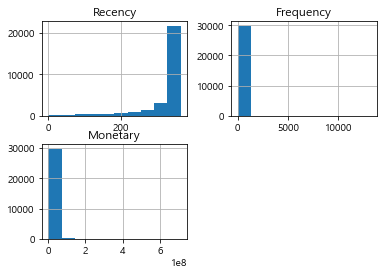

In [17]:
df_rfm.hist()

    - 그래프를 보았을 때, Recency의 경우 오른쪽으로, 나머지의 경우 왼쪽으로 치우친 것을 볼 수 있음
    - 대부분의 고객들은 최근에 방문을 한 경험이 있고, 대부분의 고객들은 구매를 적게하고, 구매금액 또한 적다
    - 최근에 거래를 한 뉴비들의 데이터로 보아도 무방할듯..?

- Recency를 어떤 기준으로 나눌 것인가?
    - 히스토그램과 분위수를 확인하여 임의로 나누어줌 -> 이후에 변경해야될듯

In [18]:
df_rfm['Recency'].describe()

count    29874.000000
mean       323.643570
std         68.386009
min          0.000000
25%        322.000000
50%        354.000000
75%        361.000000
max        364.000000
Name: Recency, dtype: float64

In [19]:
df_rfm[df_rfm['Recency'] <= 300]['Recency'].describe()

count    5605.000000
mean      204.179304
std        79.642820
min         0.000000
25%       152.000000
50%       226.000000
75%       272.000000
max       300.000000
Name: Recency, dtype: float64

In [20]:
# 등급을 계산해줌
def recency(r):
    if r >= 300:
        return 5
    elif r >= 272:
        return 4
    elif r >= 226:
        return 3
    elif r >= 152:
        return 2
    else:
        return 1

# 개별 값에 대해 반복하기 때문에 map 함수
df_rfm['R'] = df_rfm['Recency'].map(lambda x: recency(x))

- Frequency
    - Ted Miglautsch의 방법을 사용
        - 1. 1회 구매자들에게는 1등급을 준다.
        - 2. 1등급을 제외하고, 남은 고객들의 빈도를 평균내어 평균보다 낮은 그룹에게 2등급을 준다.
        - 3. 반복하여 4등급까지 만들고, 남은 고객들은 5등급을 할당한다.

In [21]:
def frequency(f):
    # 원본을 건드리지 않기 위해 새로 만듦
    s = pd.Series([0 for _ in range(len(f))])

    # 빈도가 1이면 1등급을 준다
    s[f == 1] = 1
    state = 2
    while state <= 4:
        # 아직 등급이 부여되지 않은 값들에 대해(값이 0), 평균보다 작은 값에 등급을 부여한다
        s[(s == 0) & (f < f[s == 0].mean())] = state
        state += 1

    # 남은 것들은 5등급을 준다
    s[s==0] = 5

    return s

# 전체 값에 대해 접근하기 때문에 Series 전체를 함수에 넘김
df_rfm['F'] = frequency(df_rfm['Frequency'])

- Monetary 
    - Monetary 5등급에 속한 5명의 고객이 총 100만원의 매출을 만들었다면 1등급은 100명의 고객이 100만원의 매출을 만드는 식으로 할당

In [22]:
def monetary(m):
    # copy를 만들어서 오름차순 정렬한다
    s = m.copy()
    qc = pd.qcut(s, 5, labels=False)

    return (qc + 1)

df_rfm['M'] = monetary(df_rfm['Monetary'])

In [23]:
# 확인
df_rfm.head(3)

,Customer_ID,Recency,Frequency,Monetary,R,F,M
0,M000034966,356,49,616240,5,2,2
1,M000059535,61,1,46000,1,1,1
2,M000136117,363,121,28697031,5,2,5


- 분포 확인

In [24]:
df_rfm.groupby(['R']).agg({'Customer_ID': 'count'})

,Customer_ID
R,
1,1399
2,1398
3,1397
4,1370
5,24310


In [25]:
# 1회 구매 고객이 생각보다 많이 적은 모습을 보임 -> 수정 필요
df_rfm.groupby(['F']).agg({'Customer_ID': 'count'})

,Customer_ID
F,
1,1529
2,19030
3,6004
4,2152
5,1159


In [26]:
df_rfm.groupby(['M']).agg({'Customer_ID': 'count'})

,Customer_ID
M,
1,5976
2,5974
3,5974
4,5975
5,5975


- RFM시각화
    - 3차원을 2차원으로 시각화해서 확인

    - R과 F에 따른 고객의 수를 확인해봄

In [27]:
# 3차원을 수와 Momentary를 2차원으로 하여 시각화
rf_matrix = df_rfm.groupby(['R', 'F']).agg({
    'Customer_ID': 'count', 
    'Monetary': 'sum'}).reset_index()
rf_matrix['avg_sales'] = rf_matrix['Monetary']/rf_matrix['Customer_ID']

In [28]:
# R과 F에 따른 고객의 수를 확인해봄
rf_pivot = rf_matrix\
    .pivot(index='F', columns='R', values='Customer_ID')\
    .fillna(0)\
    .sort_index(ascending=False)
    
rf_pivot\
    .style\
    .background_gradient(cmap ='Blues', axis=None, low=0.2)

R,1,2,3,4,5
F,,,,,
5,0.000000,0.000000,4.000000,2.000000,1153.000000
4,2.000000,4.000000,6.000000,8.000000,2132.000000
3,6.000000,17.000000,36.000000,48.000000,5897.000000
2,818.000000,1047.000000,1159.000000,1218.000000,14788.000000
1,573.000000,330.000000,192.000000,94.000000,340.000000


    - R-F 등급별 평균 구매 금액 확인

In [29]:
rf_pivot = rf_matrix\
    .pivot(index='F', columns='R', values='avg_sales')\
    .fillna(0)\
    .sort_index(ascending=False)
    
rf_pivot\
    .style\
    .background_gradient(cmap ='Blues', axis=None, low=0.2)

R,1,2,3,4,5
F,,,,,
5,0.000000,0.000000,11619460.250000,3688824.000000,12311170.093669
4,2749411.500000,4030574.250000,2636045.000000,4736241.125000,11431215.671670
3,1805887.166667,2669036.058824,2245242.666667,4780557.354167,7553354.285060
2,400631.812958,500746.073543,774192.134599,972383.567323,2658943.465580
1,92586.221640,63786.027273,66274.911458,66688.457447,63252.682353


- 가중치 해보자

In [30]:
def get_score(level, data, reverse = False):
    '''
    Description :
    level안에 있는 원소를 기준으로
    1 ~ len(level)+ 1 까지 점수를 부여하는 함수
    
    Parameters :
    level = 튜플 또는 리스트 타입의 숫자형 데이터이며 반드시 오름차순으로 정렬되어 있어야함.
    예 - [1,2,3,4,5] O, [5,4,3,2,1] X, [1,3,2,10,4] X 
    data = 점수를 부여할 데이터. 순회가능한(iterable) 데이터 형식
    reverse = 점수가 높을 때 그에 해당하는 값을 낮게 설정하고 싶을 때 True
    return :
    점수를 담고 있는 리스트 반환
    '''
    score = [] 
    for j in range(len(data)): 
        for i in range(len(level)): 
            if data[j] <= level[i]: 
                score.append(i+1) 
                break 
            elif data[j] > max(level): 
                score.append(len(level)+1) 
                break 
            else: 
                continue
    if reverse:
        return [len(level)+2-x for x in score]
    else:
        return score

In [31]:
grid_number = 100 ## 눈금 개수, 너무 크게 잡으면 메모리 문제가 발생할 수 있음.
weights = []
for j in range(grid_number+1):
    weights += [(i/grid_number,j/grid_number,(grid_number-i-j)/grid_number)
                  for i in range(grid_number+1-j)]
num_class = 5 ## 클래스 개수
class_level = np.linspace(1,5,num_class+1)[1:-1] ## 클래스를 나누는 지점을 정한다.
total_amount_of_sales = df_rfm['Monetary'].sum() ## 구매금액 총합 = 총 매출

In [32]:
max_std = 0 ## 표준편차 초기값
for w in tqdm(weights,position=0,desc = '[Finding Optimal weights]'):
    ## 주어진 가중치에 따른 고객별 점수 계산
    score = w[0]*df_rfm['R'] + \
                        w[1]*df_rfm['F'] + \
                        w[2]*df_rfm['M'] 
    df_rfm['Class'] = get_score(class_level,score,True) ## 점수를 이용하여 고객별 등급 부여
    ## 등급별로 구매금액을 집계한다.
    grouped_result = df_rfm.groupby('Class')['Monetary'].sum().reset_index()
    
    ## 제약조건 추가 - 등급이 높은 고객들의 매출이 낮은 등급의 고객들보다 커야한다.
    grouped_result = grouped_result.sort_values('Class')
    
    temp_monetary = list(grouped_result['Monetary'])
    if temp_monetary != sorted(temp_monetary,reverse=True):
        continue
    
    ## 클래스별 구매금액을 총구매금액으로 나누어 클래스별 매출 기여도 계산
    grouped_result['Monetary'] = grouped_result['Monetary'].map(lambda x : x/total_amount_of_sales)
    std_sales = grouped_result['Monetary'].std() ## 매출 기여도의 표준편차 계산
    if max_std <= std_sales:
        max_std = std_sales ## 표준편차 최대값 업데이트
        optimal_weights = w  ## 가중치 업데이트

[Finding Optimal weights]: 100%|███████████████████████████████████████████████████| 5151/5151 [30:08<00:00,  2.85it/s]


In [37]:
print(optimal_weights)

(0.76, 0.01, 0.23)


In [38]:
df_rfm

,Customer_ID,Recency,Frequency,Monetary,R,F,M,Class
0,M000034966,356,49,616240,5,2,2,4
1,M000059535,61,1,46000,1,1,1,5
2,M000136117,363,121,28697031,5,2,5,4
3,M000201112,331,20,51420,5,2,1,4
4,M000225114,364,163,2084270,5,2,4,4
...,...,...,...,...,...,...,...,...
29869,M999708287,244,2,60000,3,2,1,4
29870,M999770689,364,402,2078770,5,4,4,2
29871,M999849895,334,70,1095312,5,2,3,4
29872,M999926092,335,7,129500,5,2,1,4


## END